In [ ]:
import pandas as pd

#region Importazionie
file_path = r"C:\Users\JoaquimFrancalanci\OneDrive - ITS Angelo Rizzoli\Desktop\MachineLearning\shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

print(df.head())

In [4]:
#Group customers based on their behaviors for targeted strategies
columns_for_clustering = ['Age', 'Purchase Amount (USD)', 'Review Rating', 
                          'Previous Purchases', 'Frequency of Purchases']

numerical_features = [col for col in columns_for_clustering if df[col].dtype in ["int64", "float64"]]
categorical_features = [col for col in columns_for_clustering if col not in numerical_features]

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_features = encoder.fit_transform(df[categorical_features])

In [ ]:
data_for_clustering = pd.concat([df[numerical_features], pd.DataFrame(encoded_categorical_features, columns=encoder.get_feature_names_out(categorical_features))], axis=1)

data_for_clustering.head()

In [ ]:
scaler = StandardScaler()
scaler.fit(data_for_clustering)
data_for_clustering = scaler.transform(data_for_clustering)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

In [45]:
def perform_kmeans(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg, cluster_labels

num_clusters = 3

kmeans_silhouette, kmeans_labels = perform_kmeans(data_for_clustering, num_clusters)
df['KMeans_Cluster'] = kmeans_labels

print(f"KMeans clustering silhouette score: {kmeans_silhouette}")

c:\Users\JoaquimFrancalanci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans clustering silhouette score: 0.190864594347681


In [44]:
def perform_hierarchical_clustering(data, num_clusters):
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = hierarchical.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg, cluster_labels

hierarchical_silhouette, hierarchical_labels = perform_hierarchical_clustering(data_for_clustering, num_clusters)
df['Hierarchical_Cluster'] = hierarchical_labels

print(f"Hierarchical clustering silhouette score: {hierarchical_silhouette}")

Hierarchical clustering silhouette score: 0.1909014518077724


In [43]:
def perform_dbscan(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg, cluster_labels

dbscan_silhouette, dbscan_labels = perform_dbscan(data_for_clustering, eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan_labels

print(f"DBSCA clustering silhouette score: {dbscan_silhouette}")

DBSCA clustering silhouette score: -0.5638072170896267


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

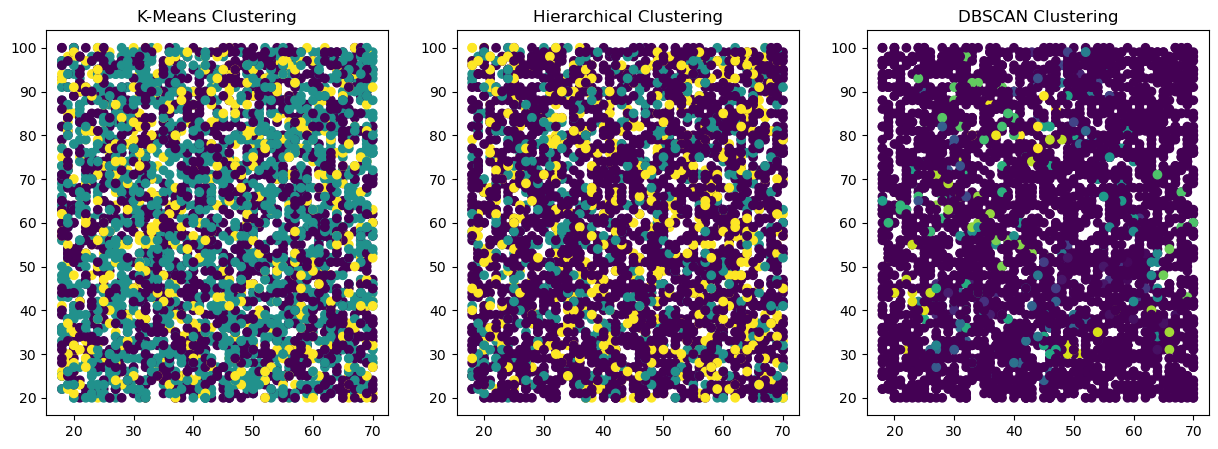

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(132)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(133)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

In [19]:
from mpl_toolkits.mplot3d import Axes3D

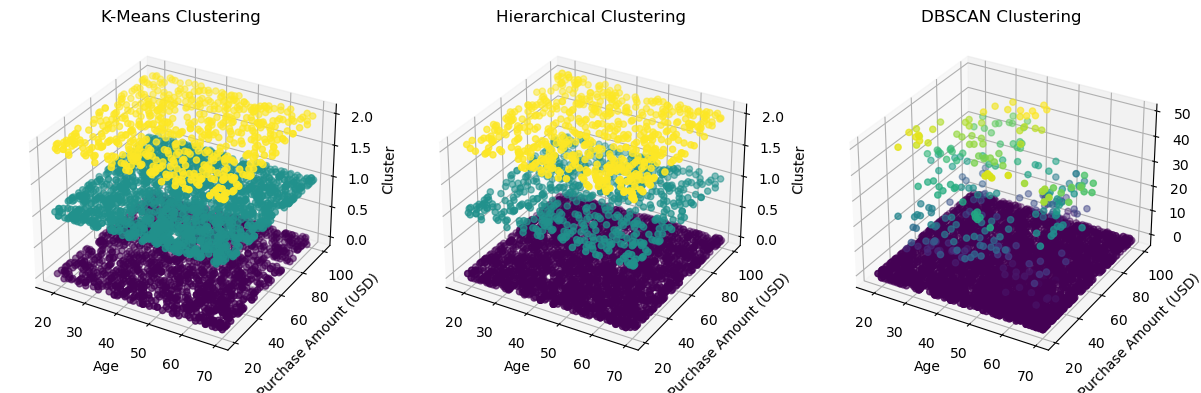

In [41]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df['Age'], df['Purchase Amount (USD)'], df['KMeans_Cluster'], c=df['KMeans_Cluster'], cmap='viridis')
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('Age')
ax1.set_ylabel('Purchase Amount (USD)')
ax1.set_zlabel('Cluster')

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df['Age'], df['Purchase Amount (USD)'], df['Hierarchical_Cluster'], c=df['Hierarchical_Cluster'], cmap='viridis')
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('Age')
ax2.set_ylabel('Purchase Amount (USD)')
ax2.set_zlabel('Cluster')

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df['Age'], df['Purchase Amount (USD)'], df['DBSCAN_Cluster'], c=df['DBSCAN_Cluster'], cmap='viridis')
ax3.set_title('DBSCAN Clustering')
ax3.set_xlabel('Age')
ax3.set_ylabel('Purchase Amount (USD)')
ax3.set_zlabel('Cluster')

plt.show()